# **Linear & Non-Linear Regression on Carbon dioxide emission of vehicles**

## **Table of Contents**

* [Data Exploration (EDA)](#EDA)
* [Model Development - Simple Linear Regression (SLR)](#Simple)
* [Model Evaluation - Simple Linear Regression](#SimpleEvaluation)
* [Model Development - Multiple Linear Regression (MLR)](#Multiple)
* [Model Evaluation - Multipe Linear Regression](#MultipleEvaluation)
* [Model Development - Polynomial Linear Regression (PLR)](#Polynomial)
* [Model Evaluation - Polynomial Linear Regression](#PolynomialEvaluation)
* [Non Linear Regression Analysis](#nonlinear)
* [Method Development - Logistic (Sigmoid) Regression](#Logistic)
* [Model Evaluation - Logistic (Sigmoid) Regression](#LogisticEvaluation)


## **Importing the required packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Dataset Information**
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)


## **Load the Fuel Consumption dataset**

In [2]:
df = pd.read_csv("/content/MY2022 Fuel Consumption Ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Exploration**<a name="EDA"></a>

In [3]:
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

In [7]:
df['Model Year'].value_counts()

2022    946
Name: Model Year, dtype: int64

In [8]:
df['Engine Size(L)'].value_counts()

2.0    210
3.0    134
2.5     72
3.5     50
5.3     49
3.6     47
4.0     40
6.2     33
5.0     32
1.5     32
2.3     26
4.4     25
1.6     23
2.4     21
2.7     18
2.9     17
5.7     15
5.2     11
1.8      9
6.4      9
3.8      8
1.3      8
3.3      7
3.4      7
6.7      7
1.4      6
2.8      5
1.2      4
6.0      4
3.7      4
8.0      3
3.2      3
6.5      3
5.6      2
6.6      1
4.6      1
Name: Engine Size(L), dtype: int64

In [9]:
df['Cylinders'].value_counts()

4     404
6     295
8     197
3      21
12     17
10      8
16      3
5       1
Name: Cylinders, dtype: int64

In [10]:
df['CO2 Rating'].value_counts()

5     266
4     228
3     189
6     113
7      71
2      48
9      13
8      10
1       7
10      1
Name: CO2 Rating, dtype: int64

In [11]:
df['Smog Rating'].value_counts()

5    308
3    198
7    194
6    189
1     57
Name: Smog Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


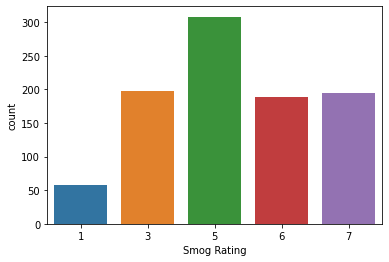

In [12]:
sns.countplot(df['Smog Rating']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


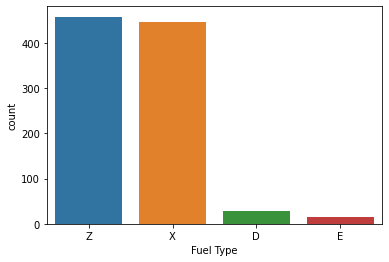

In [13]:
sns.countplot(df['Fuel Type']);

### **Descriptive Statistical Analysis**

In [14]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [15]:
df_fueltype = df.groupby(['Fuel Type'],as_index=False).mean()
df_fueltype

,Fuel Type,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,D,2022.0,2.964286,5.642857,11.282143,8.664286,10.117857,28.107143,271.571429,4.142857,2.500000
1,E,2022.0,4.457143,7.142857,19.864286,14.992857,17.692857,16.285714,294.857143,3.642857,4.285714
2,X,2022.0,2.877578,5.040359,11.225336,8.780269,10.124888,30.038117,237.580717,5.042601,5.730942
3,Z,2022.0,3.487336,6.235808,13.603930,9.801747,11.891703,24.812227,278.349345,4.100437,4.360262


Fuel type:
 X = regular gasoline; Z = premium gasoline; D = diesel; E = E85; 
 
E85 gas which is made up of between 51% and 83% ethanol blended with gasoline seems to have the highest CO2 emissions and subsequently lowest CO2 rating. Its fuel consumption is also very high in both city and highway. Regular gasoline seems to be fuel efficient both in terms of consumption and emission. 

In [16]:
df.corr()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [17]:
df.drop(['Model Year'], axis = 1).corr()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [18]:
df.drop(['Model Year'], axis = 1).corr().unstack().sort_values(ascending = False).drop_duplicates()

Engine Size(L)                     Engine Size(L)                       1.000000
Fuel Consumption (City (L/100 km)  Fuel Consumption(Comb (L/100 km))    0.990321
Fuel Consumption(Comb (L/100 km))  CO2 Emissions(g/km)                  0.971671
                                   Fuel Consumption(Hwy (L/100 km))     0.967138
CO2 Emissions(g/km)                Fuel Consumption (City (L/100 km)    0.965632
CO2 Rating                         Fuel Consumption(Comb (mpg))         0.949561
Fuel Consumption(Hwy (L/100 km))   CO2 Emissions(g/km)                  0.933991
                                   Fuel Consumption (City (L/100 km)    0.922850
Cylinders                          Engine Size(L)                       0.920698
                                   Fuel Consumption (City (L/100 km)    0.845688
Fuel Consumption (City (L/100 km)  Engine Size(L)                       0.834925
Cylinders                          CO2 Emissions(g/km)                  0.833241
CO2 Emissions(g/km)         

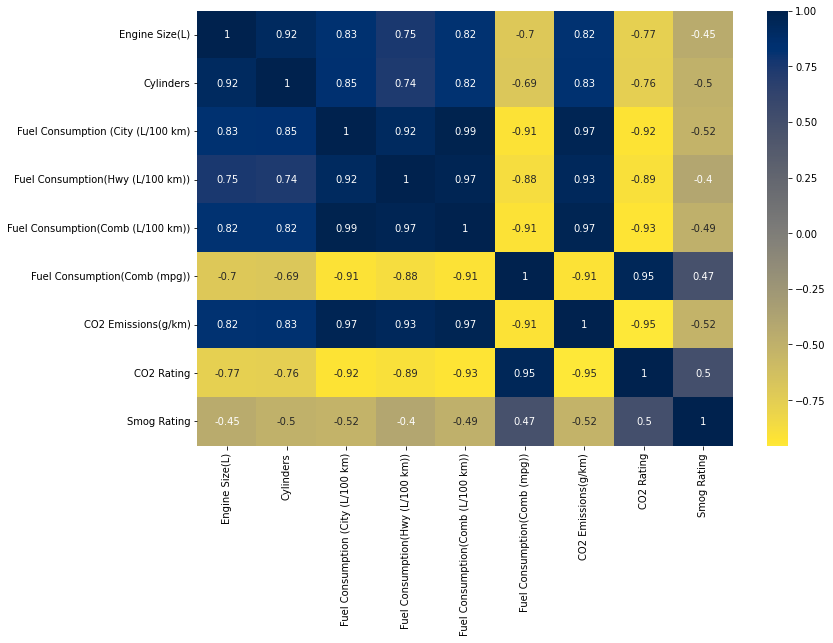

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Model Year'], axis = 1).corr(), cmap="cividis_r", annot = True);

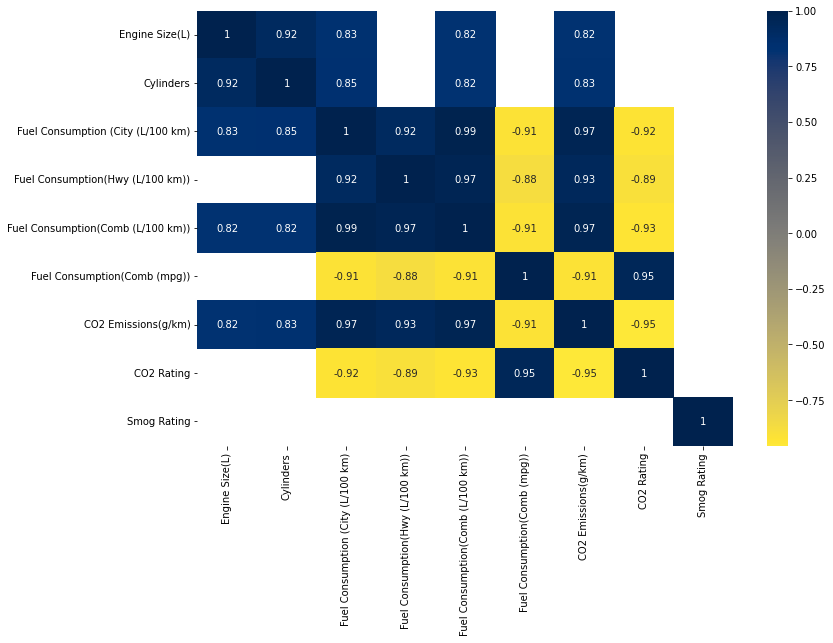

In [20]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

**P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

In [21]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is 0.833240570133112  with a P-value of P = 3.6276159873873733e-245
The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is 0.8241875694085823  with a P-value of P = 2.4338710526790506e-235
The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8217180823738502  with a P-value of P = 9.314329241215394e-233
The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.8186935336201379  with a P-value of P = 1.198288656221755e-229


**Conclusion:** 

Since the p-value is < 0.001, all inter correlations between Cylinders, Engine Size, City Fuel Consumption and CO2 Emissions are statistically significant, and their linear relationship are also extremely strong (>0.80)

#### **Box Plots**
A box plot is a way of statistically representing the distribution of the data through five main dimensions:
* Minimun: Smallest number in the dataset.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: Highest number in the dataset.


##### **Vehicle Class Vs CO2 Emissions**

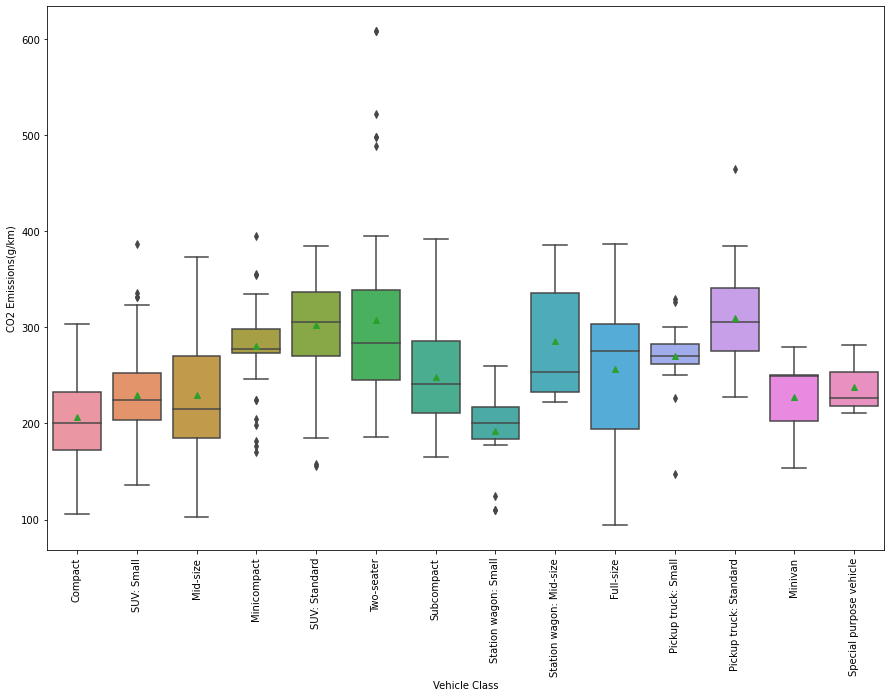

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True);

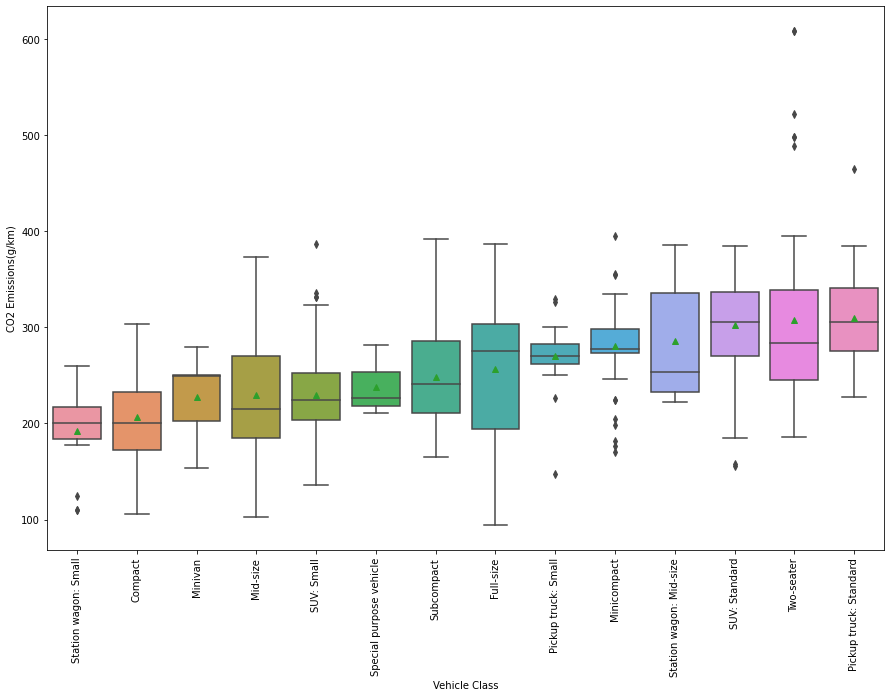

In [23]:
sorted = df[['Vehicle Class', 'CO2 Emissions(g/km)']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index);

##### **Vehicle Class Vs Combined City & Highway Fuel Consumption**

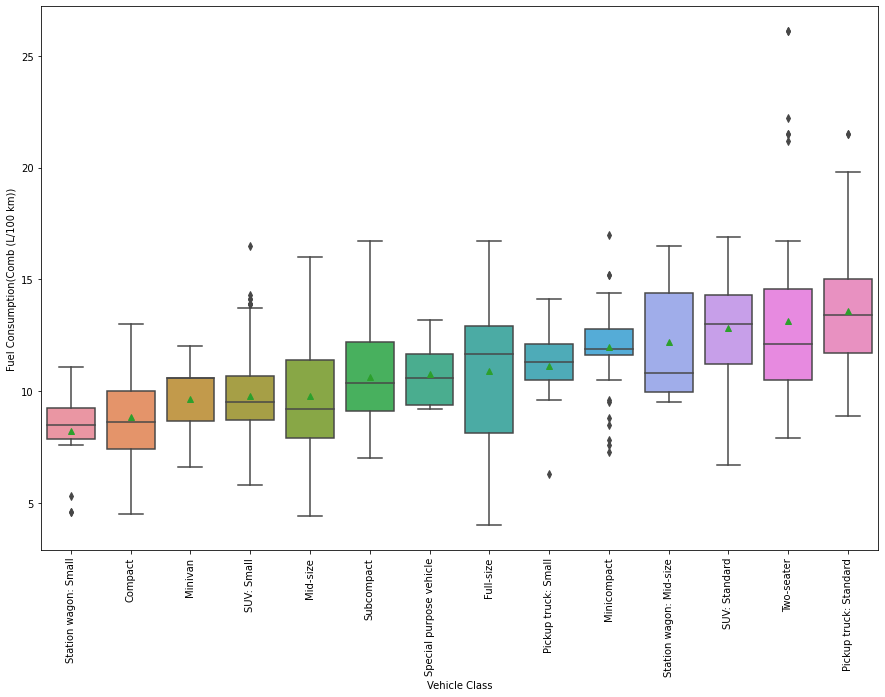

In [24]:
sorted = df[['Vehicle Class', 'Fuel Consumption(Comb (L/100 km))']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index);

#### **ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable. 

ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.  A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value.
If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.


##### **Cylinders Vs CO2 Emissions**

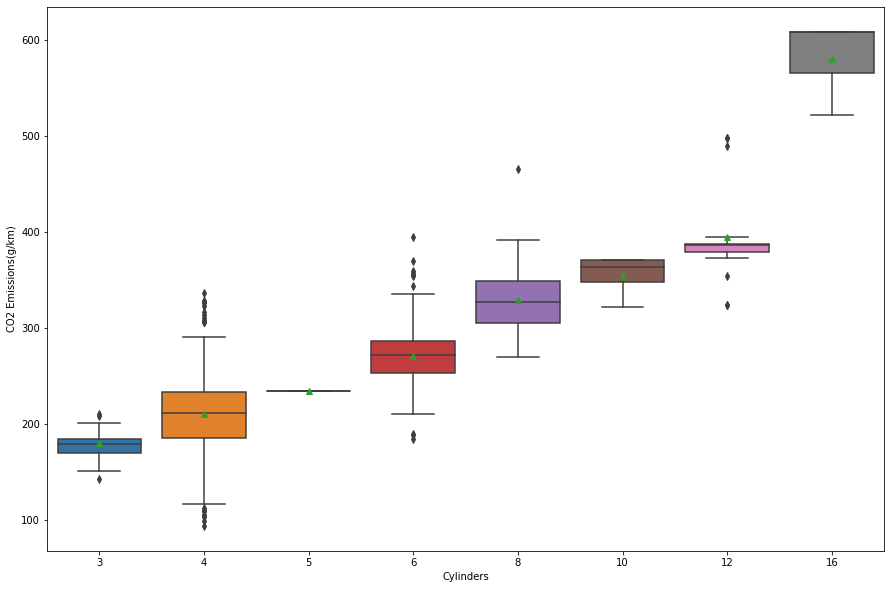

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True);

In [26]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 4],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 5],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 10],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 12],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=321.2813100475542, pvalue=4.589761627416592e-244)

A large F test score in CO2 Emissions vs Cylinders showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. 

In [27]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=874.050688878219, pvalue=3.32452781962158e-19)

In [28]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8])

F_onewayResult(statistic=428.67632447662686, pvalue=6.98803257820752e-69)

##### **Fuel Type Vs CO2 Emissions**

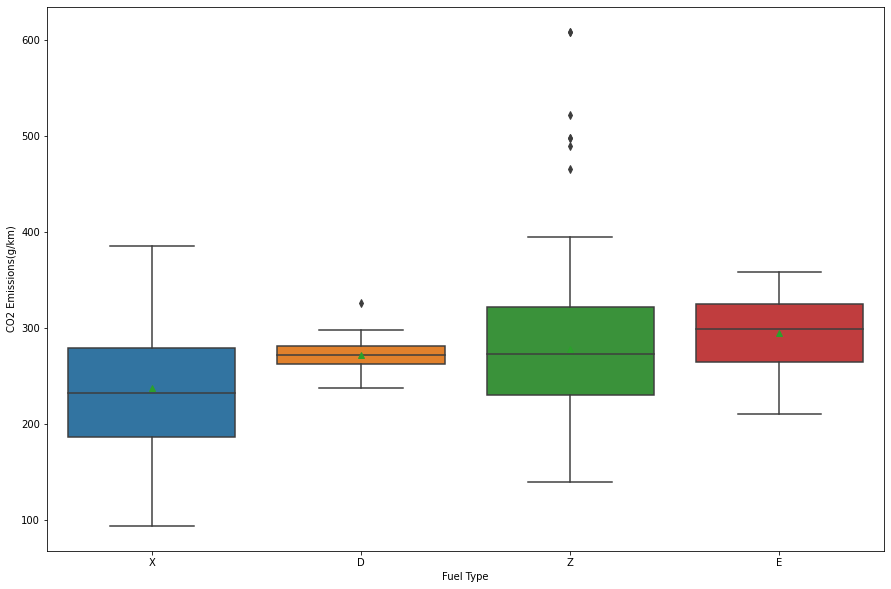

In [29]:
sorted = df[['Fuel Type', 'CO2 Emissions(g/km)']].groupby("Fuel Type").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index);

In [30]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'D'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=35.48640509656308, pvalue=9.88191995336441e-22)

In [31]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=11.635431082401071, pvalue=0.0007044084771900461)

In [32]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'D'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'])

F_onewayResult(statistic=0.33087960541601835, pvalue=0.5654089094518961)

##### **Fuel Type Vs Combined City & Highway Fuel Consumption**

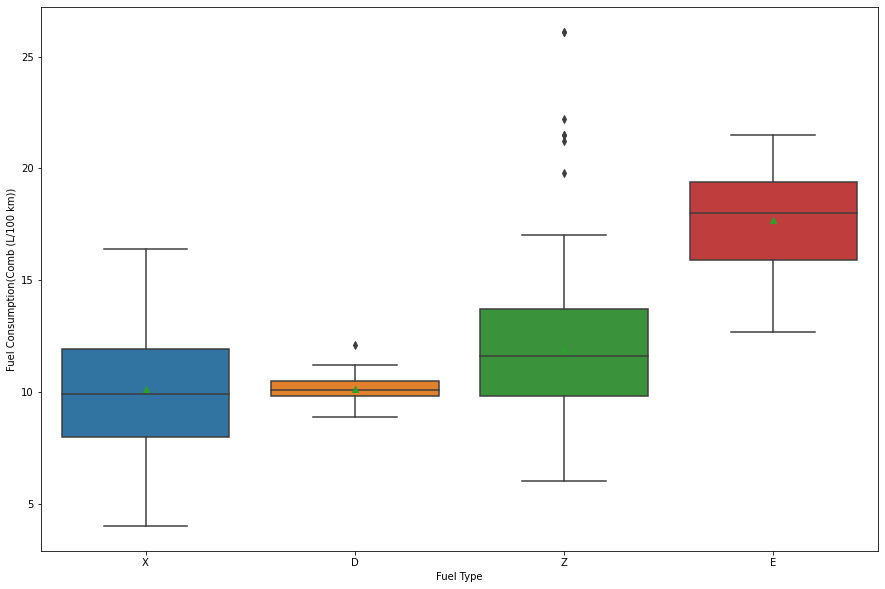

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Fuel Type", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index);

In [34]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=65.34018094901431, pvalue=2.1920897177077466e-38)

In [35]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=110.19374589310341, pvalue=3.034646341035104e-23)

In [36]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'])

F_onewayResult(statistic=12.402523362459322, pvalue=0.00046935004647786745)

##### **Cylinders Vs Combined City & Highway Fuel Consumption**

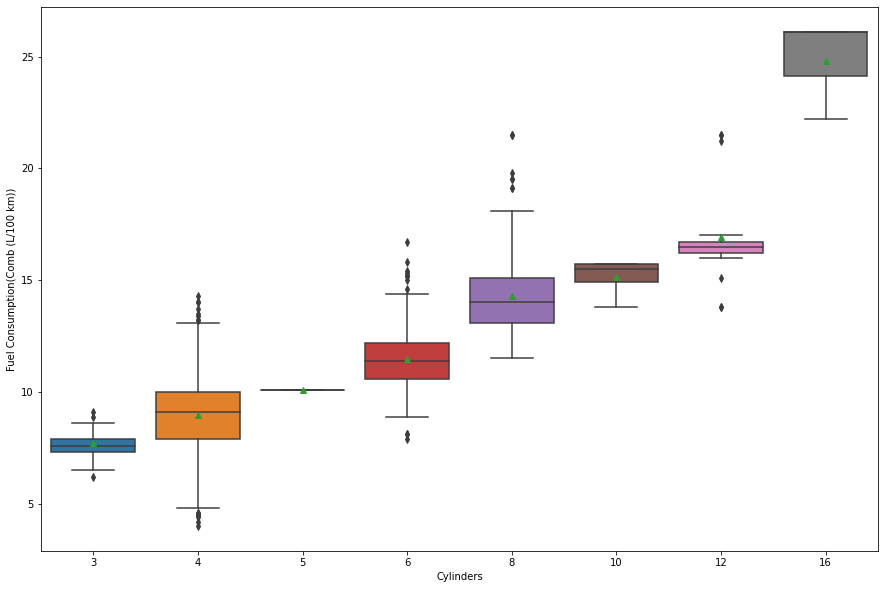

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True);

In [38]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

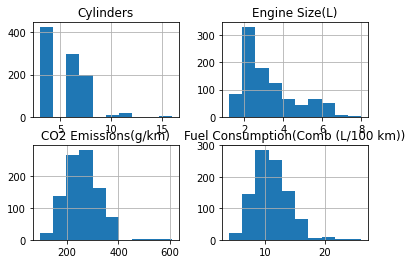

In [39]:
viz = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist()
plt.show()

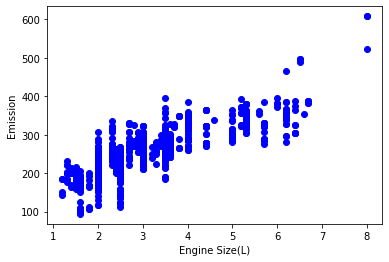

In [40]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'],  color='blue')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

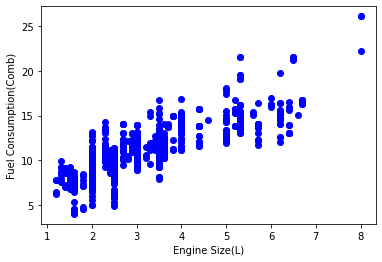

In [41]:
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'],  color='blue')
plt.xlabel("Engine Size(L)")
plt.ylabel("Fuel Consumption(Comb)")
plt.show()

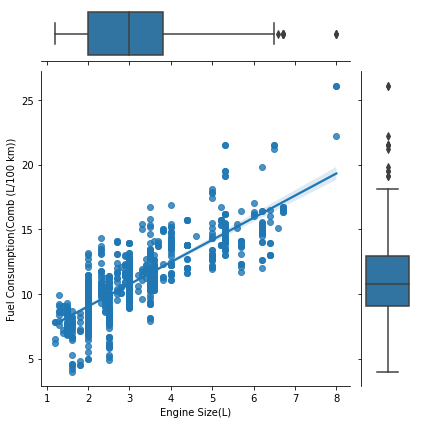

In [42]:
g = sns.JointGrid(x="Engine Size(L)", y='Fuel Consumption(Comb (L/100 km))', data=df)
g = g.plot(sns.regplot, sns.boxplot)

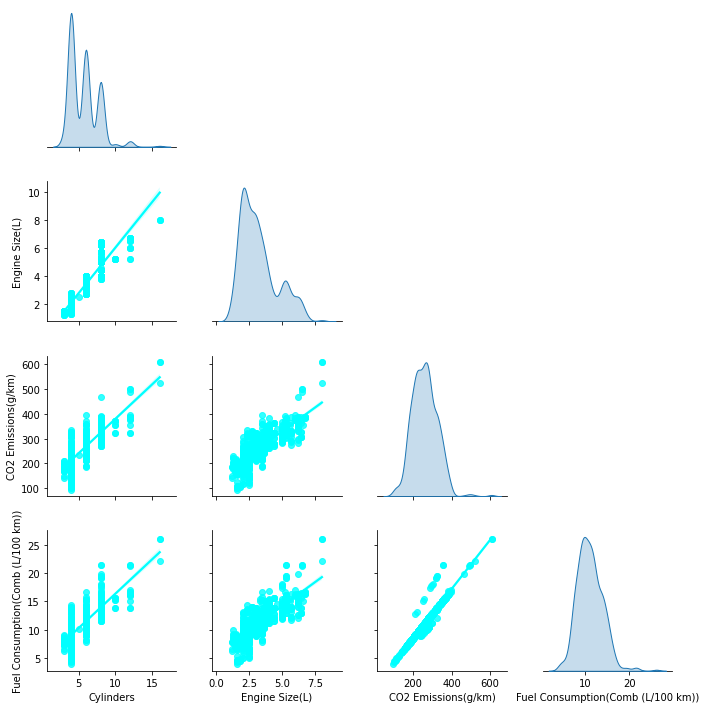

In [43]:
sns.pairplot(data = df, vars=['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))'], 
             kind ='reg', diag_kind="kde", plot_kws={'color':'#00ffff'},corner=True);

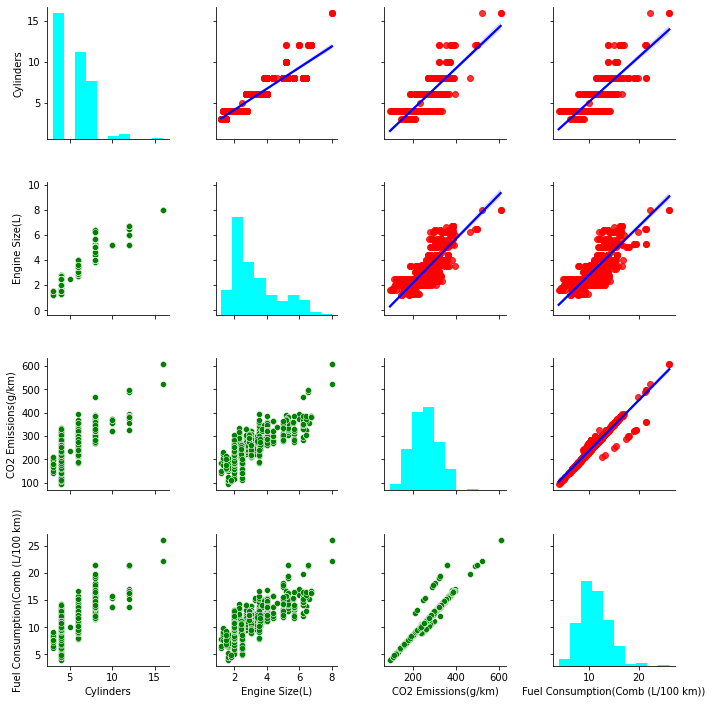

In [44]:
g = sns.PairGrid(df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']])
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist, color ='cyan');

## **Model Development: Simple Linear Regression**<a name="Simple"></a>
Simple Linear Regression is a method to understand the relationship between two variables:
* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.
$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

<b>Linear function:</b>
$$
Yhat = a + b  X
$$
<ul>
* a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
* b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

### **Building the Linear Regression Model**


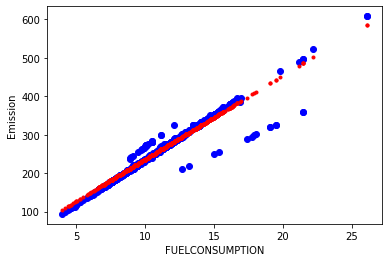

In [45]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = df[['Fuel Consumption(Comb (L/100 km))']]
y = df['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission")
plt.show()

In [46]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)


17.6939141145848
[21.77035931]


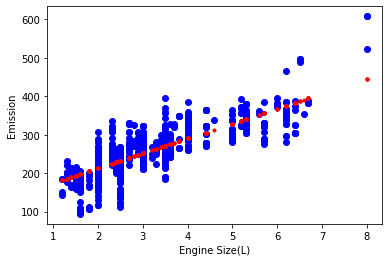

In [47]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = df[['Engine Size(L)']]
y = df['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

In [48]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)

135.59562745687725
[38.63302592]


A final linear model with the structure should be obtained:

Yhat=a+bX

Plugging in the actual values to obtain the linear function.

CO2 Emissions(g/km) = 135.60 + 38.63 x Engine Size(L)


### **Building model using train and test datasets created after Train/Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 
One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that the outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Split the entire dataset into 80% for training, and the 20% for testing. Create a mask to select random rows using np.random.rand() function:

In [49]:
msk = np.random.rand(len(df)) < 0.8
msk[0:20]

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [50]:
train = df[msk]
test = df[~msk]
train.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7


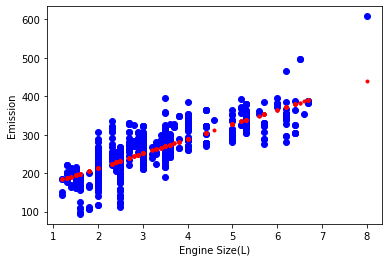

In [51]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = train[['Engine Size(L)']]
y = train['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

## **Model Evaluation - Simple Linear Regression**<a name="SimpleEvaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>
<ul>
    <li> Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)] </li>
    __explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.
</ul>

In [52]:
X_test = test[['Engine Size(L)']]
y_test = test['CO2 Emissions(g/km)']
Yhat_lm = lm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Simple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_lm))
print('Mean Squared Error(MSE) of Simple Linear regression:', metrics.mean_squared_error(y_test, Yhat_lm))
print('Root Mean Squared Error (RMSE) of Simple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_lm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Simple Linear regression: %.2f' % lm.score(X, y))
print('Explained Variance Score (EVS) of Simple Linear regression:',explained_variance_score(y_test, Yhat_lm))
#Residual sum of squares (rss)
print("Residual sum of squares of Simple Linear regression: %.2f" % np.mean((Yhat_lm - y_test) ** 2))
print('R2 of Simple Linear regression:',metrics.r2_score(y_test, Yhat_lm))
print('R2 rounded of Simple Linear regression:',(metrics.r2_score(y_test, Yhat_lm)).round(2))
r2 = r2_score(y_test, Yhat_lm)
r2_rounded = r2_score(y_test, Yhat_lm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Simple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lm.score(X_test, y_test)
print("Accuracy of Simple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Simple Linear regression: 28.172689241045465
Mean Squared Error(MSE) of Simple Linear regression: 1428.4770540335228
Root Mean Squared Error (RMSE) of Simple Linear regression: 37.795198822516106
Variance score of Simple Linear regression: 0.67
Explained Variance Score (EVS) of Simple Linear regression: 0.7041949078502867
Residual sum of squares of Simple Linear regression: 1428.48
R2 of Simple Linear regression: 0.703600226910507
R2 rounded of Simple Linear regression: 0.7
Adjusted_r2 of Simple Linear regression:  0.702
Accuracy of Simple Linear regression: 0.703600226910507


### **Summary statistics of Train set**

In [53]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.673
Model:                             OLS   Adj. R-squared:                  0.672
Method:                  Least Squares   F-statistic:                     1598.
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):          8.83e-191
Time:                         17:15:11   Log-Likelihood:                -3906.6
No. Observations:                  780   AIC:                             7817.
Df Residuals:                      778   BIC:                             7827.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            138.2879      3.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### **Summary statistics of Test set**

In [54]:
import statsmodels.api as sm
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.716
Model:                             OLS   Adj. R-squared:                  0.714
Method:                  Least Squares   F-statistic:                     412.7
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):           1.22e-46
Time:                         17:15:11   Log-Likelihood:                -835.06
No. Observations:                  166   AIC:                             1674.
Df Residuals:                      164   BIC:                             1680.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            122.6731      7.3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### **Plot to display deviations from perfect prediction**

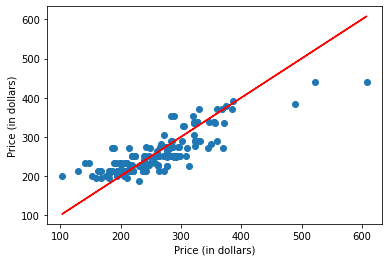

In [55]:
# Final predictions
plt.scatter(y_test,Yhat_lm)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(y_test,y_test,'r');


**Residual Plot**

A good way to visualize the variance of the data is to use a residual plot. A good way to visualize the variance of the data is to use a residual plot. 

**Residuals**
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

Pay attention to the spread of the residuals when looking at a residual plot:
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

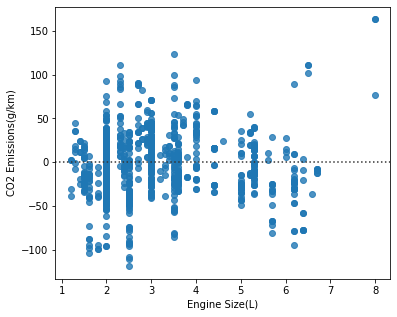

In [56]:
plt.figure(figsize=((6,5)))
sns.residplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df)
plt.show();

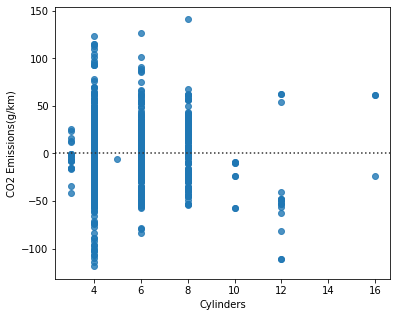

In [57]:
plt.figure(figsize=((6,5)))
sns.residplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = df)
plt.show();

## **Model Development: Multiple Linear Regression (MLR)**<a name="Multiple"></a>
When a dependent variable is predicted with more than one independent variable, the method is termed as multiple linear regression. In this project, co2emission is predicted using FUELCONSUMPTION_COMB, EngineSize and Cylinders of vehicles. In other words, Multiple linear regression is considered as an extension of simple linear regression model.

In [58]:
df_model = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
train = df_model[msk]
test = df_model[~msk]
X_train = train[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (L/100 km))']]
y_train = train['CO2 Emissions(g/km)']
X_test = test[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (L/100 km))']]
y_test = test['CO2 Emissions(g/km)']   

from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  18.94916328912757
The Coefficients of mutiple linear regression model is:  [ 2.33393727  1.48173181 20.03596953]


Scikit-learn uses plain Ordinary Least Squares method to find parameters like the intercept and coefficients of hyperplane. 

**Ordinary Least Squares (OLS)**

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and the predicted output ( y^ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

A final linear model with the structure should be obtained:
$$
Yhat=a + bX + cX + dx
$$
Plugging in the actual values to obtain the linear function.

$$
CO2 Emissions(g/km) = 20.95 + 3.13 x  Cylinders + 0.89 x Engine Size(L) + 19.58 x Fuel Consumption(Comb (L/100 km))
$$

## **Model Evaluation - Multipe Linear Regression**<a name="MultipleEvaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and the difference is used to calculate the accuracy of a regression model.

There are different methods of model evaluation metrics as follows:

Mean absolute error: It is the mean of the absolute value of the errors.
Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).
Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
Residual sum of squares (rss): Sum of residuals squared
R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
R-squared: 1 - (rss/tss)
Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)]
__explained variance regression score:__ If  𝑦̂   is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:
𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦} 
The best possible score is 1.0, lower values are worse.

In [59]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 7.515282457303378
Mean Squared Error(MSE) of Multiple Linear regression: 291.9225917814835
Root Mean Squared Error (RMSE) of Multiple Linear regression: 17.08574235383068
Variance score of Multiple Linear regression: 0.95
Explained Variance Score (EVS) of Multiple Linear regression: 0.9394292910324835
Residual sum of squares of Multiple Linear regression: 291.92
R2 of Multiple Linear regression: 0.939427945503633
R2 rounded of Multiple Linear regression: 0.94
Adjusted_r2 of Multiple Linear regression:  0.938
Accuracy of Multiple Linear regression: 0.939427945503633


### **Plot to display deviations from perfect prediction**


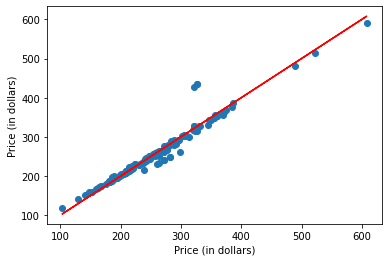

In [60]:
# Final predictions
plt.scatter(y_test,Yhat_mlm)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(y_test,y_test,'r');


### **Summary statistics of Train set**

In [61]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.950
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     4906.
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                         17:15:13   Log-Likelihood:                -3174.3
No. Observations:                  780   AIC:                             6357.
Df Residuals:                      776   BIC:                             6375.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Backward Elimination: Removing the least significant variable from the model**

From the statistics summary above, it seems the Engine size is not a statistically significant features of CO2 emission prediction. Backward Elimination is irrelevant in Python, because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions. Eventhough that's the case trying for it just to make sure to see any improvement in accuracy. 

In [62]:
df_model = df[['Cylinders','Engine Size(L)', 'CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
train = df_model[msk]
test = df_model[~msk]
X_train = train[['Cylinders','Fuel Consumption(Comb (L/100 km))']]
y_train = train['CO2 Emissions(g/km)']
X_test = test[['Cylinders','Fuel Consumption(Comb (L/100 km))']]
y_test = test['CO2 Emissions(g/km)']   

from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  17.4960293670253
The Coefficients of mutiple linear regression model is:  [ 3.16429927 20.17122061]


In [63]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.950
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     7346.
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                         17:15:13   Log-Likelihood:                -3175.5
No. Observations:                  780   AIC:                             6357.
Df Residuals:                      777   BIC:                             6371.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 7.451134369371127
Mean Squared Error(MSE) of Multiple Linear regression: 289.07204539178355
Root Mean Squared Error (RMSE) of Multiple Linear regression: 17.00211885006641
Variance score of Multiple Linear regression: 0.95
Explained Variance Score (EVS) of Multiple Linear regression: 0.9400194156558033
Residual sum of squares of Multiple Linear regression: 289.07
R2 of Multiple Linear regression: 0.9400194154895893
R2 rounded of Multiple Linear regression: 0.94
Adjusted_r2 of Multiple Linear regression:  0.939
Accuracy of Multiple Linear regression: 0.9400194154895893


### **Summary statistics of Test set**

In [65]:
import statsmodels.api as sm
X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.942
Method:                  Least Squares   F-statistic:                     1335.
Date:                 Sun, 17 Apr 2022   Prob (F-statistic):          8.57e-102
Time:                         17:15:13   Log-Likelihood:                -702.42
No. Observations:                  166   AIC:                             1411.
Df Residuals:                      163   BIC:                             1420.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## **Model Development: Polynomial Linear Regression (PLR)**<a name="Polynomial"></a>
In Polynomial regression, although  the trend of data looks curvy. the method is similar to a combination of simple linear regression and multiple linear regression. Similar to linear regression means, it is dependent on single feature. However, when it says it behaves as multiple linear regression, it is because that single feature is converted to its quadratic, cubic, quartic and so on, and it can go on and on to infinite degrees and then it is treated as MLR.  In essence, the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$$y = a + \theta_1  x + \theta_2 x^2 + \theta_3 x^3 ........\theta_\infty x^\infty $$

To fit the data on this equation with x values, such as __Engine Size__, create a few additional features: 1, $x$, and $x^2$, $x^3$...and so on.

__PloynomialFeatures()__ function in Scikit-learn library, creates a new feature sets from the original feature set. A matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. If the degree of the polynomial is selected to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

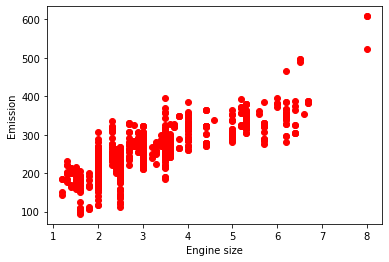

In [66]:
df_model = df[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (L/100 km))','CO2 Emissions(g/km)']]
df_model.columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
plt.scatter(df_model.ENGINESIZE, df_model.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### **Polynomial degree = 2**

In [67]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  2.  ,  4.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

**poly.fit_transform** takes the x values, and produces an output with a list of the x values raised from power of 0 to power of 2 (with the degree of polynomial set to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

For example,

$
\begin{bmatrix}
    2.4\\
    3.5\\
    2.0\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 3.5 & 12.25]\\
    [ 1 & 2.0 & 4.00]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

This looks like feature sets for multiple linear regression analysis. Polynomial regression is a special case of linear regression. This polynomial regression is considered to be a special case of traditional multiple linear regression. So, the same mechanism as linear regression can be used to solve such a problems and hence __LinearRegression()__ function is employed to solve it:

In [68]:
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression model is: ', plm.coef_)

The value of the intercept of polynomial linear regression model is:  [105.01896916]
The Coefficients of polynomial linear regression model is:  [[ 0.         57.24077964 -2.35063263]]


__Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

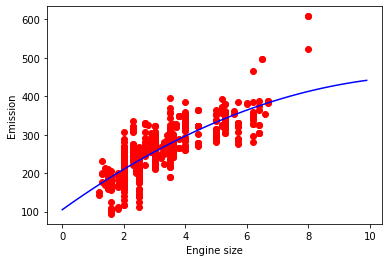

In [69]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'blue' )
plt.xlabel("Engine size")
plt.ylabel("Emission");

## **Model Evaluation - Polynomial Linear Regression**<a name="PolynomialEvaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>
<ul>
    <li> Explained Variance Score = 1 - [Variance(Ypredicted - Yactual) / Variance(Yactual)] </li>
    __explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.
</ul>

### **Evaluation Metrics**

In [70]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 2 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 2 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 2 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 2 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 2 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is: 24.588380940150554
Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is: 1034.0114895173647
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is: 32.15604903462744
Variance score of Polynomial Linear regression degree 2 is: 0.67
Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is: 0.730609764943844
Residual sum of squares of Polynomial Linear regression degree 2 is: 1034.01
R2 of Polynomial Linear regression: 0.729252402478989
R2 rounded of Polynomial Linear regression degree 2 is: 0.73
Adjusted_r2 of Polynomial Linear regression degree 2 is:  0.728
Accuracy of Polynomial Linear regression degree 2 is: 0.729252402478989


### **Plot to display deviations from perfect prediction**

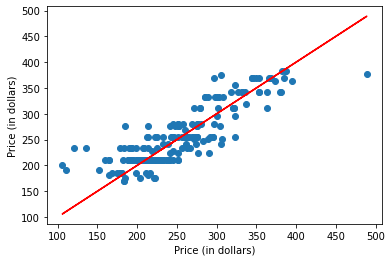

In [71]:
# Final predictions
plt.scatter(y_test,Yhat_plm)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(y_test,y_test,'r');

### **Summary statistics of Train set**

In [72]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     775.1
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.27e-183
Time:                        17:15:14   Log-Likelihood:                -3811.2
No. Observations:                 757   AIC:                             7628.
Df Residuals:                     754   BIC:                             7642.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.0190      8.973     11.704      0.0

#### **Polynomial degree = 3**

The value of the intercept of polynomial linear regression degree 3 model is:  [33.80834128]
The Coefficients of polynomial linear regression degree 3 model is:  [[  0.         122.00396652 -19.6935748    1.37488714]]


Text(0, 0.5, 'Emission')

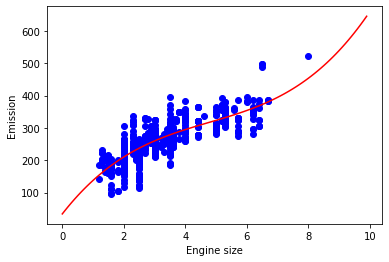

In [73]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression degree 3 model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression degree 3 model is: ', plm.coef_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2) + plm.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [74]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 3 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 3 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 3 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 3 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 3 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 3 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression degree 3 is:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 3 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 3 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 3 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 3 is: 26.039875937734905
Mean Squared Error(MSE) of Polynomial Linear regression degree 3 is: 1246.8356251217922
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 3 is: 35.31055968293043
Variance score of Polynomial Linear regression degree 3 is: 0.68
Explained Variance Score (EVS) of Polynomial Linear regression degree 3 is: 0.765573003881107
Residual sum of squares of Polynomial Linear regression degree 3 is: 1246.84
R2 of Polynomial Linear regression degree 3 is: 0.7640308206953044
R2 rounded of Polynomial Linear regression degree 3 is: 0.76
Adjusted_r2 of Polynomial Linear regression degree 3 is:  0.763
Accuracy of Polynomial Linear regression degree 3 is: 0.7640308206953044


### **Plot to display deviations from perfect prediction**

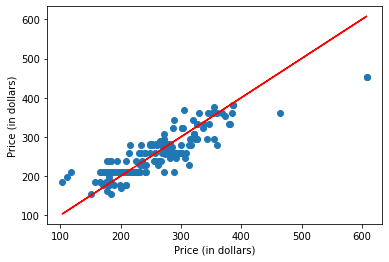

In [75]:
# Final predictions
plt.scatter(y_test,Yhat_plm)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(y_test,y_test,'r');


In [76]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     537.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.02e-187
Time:                        17:15:15   Log-Likelihood:                -3833.4
No. Observations:                 769   AIC:                             7675.
Df Residuals:                     765   BIC:                             7693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8083     20.037      1.687      0.0

The evaluation metrics and residual plots show that linear model is better option than polynomial model for this data. 

### **Fuel Consumption Vs Emission**

The value of the intercept of polynomial linear regression model is:  [-16.83549797]
The Coefficients of polynomial linear regression model is:  [[ 0.         27.71477609 -0.240336  ]]


Text(0, 0.5, 'Emission')

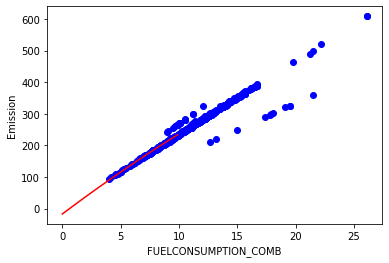

In [77]:
msk = np.random.rand(len(df)) < 0.8
train = df_model[msk]
test = df_model[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X_train = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
X_test = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
plm = linear_model.LinearRegression()
plm.fit (X_train_poly, y_train)
#The value of the intercept (a)
print('The value of the intercept of polynomial linear regression model is: ', plm.intercept_)
# The coefficients
print ('The Coefficients of polynomial linear regression model is: ', plm.coef_)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
yy = plm.intercept_[0]+ plm.coef_[0][1]*XX+ plm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [78]:
X_test_poly = poly.fit_transform(X_test)
Yhat_plm = plm.predict(X_test_poly)
k = X_test.shape[1]
n = len(X_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is:', metrics.mean_absolute_error(y_test, Yhat_plm))
print('Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is:', metrics.mean_squared_error(y_test, Yhat_plm))
print('Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_plm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Polynomial Linear regression degree 2 is: %.2f' % plm.score(X_train_poly, y_train))
print('Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is:',explained_variance_score(y_test, Yhat_plm))
#Residual sum of squares (rss)
print("Residual sum of squares of Polynomial Linear regression degree 2 is: %.2f" % np.mean((Yhat_plm - y_test) ** 2))
print('R2 of Polynomial Linear regression degree 2 is:',metrics.r2_score(y_test, Yhat_plm))
print('R2 rounded of Polynomial Linear regression degree 2 is:',(metrics.r2_score(y_test, Yhat_plm)).round(2))
r2 = r2_score(y_test, Yhat_plm)
r2_rounded = r2_score(y_test, Yhat_plm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Polynomial Linear regression degree 2 is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = plm.score(X_test_poly, y_test)
print("Accuracy of Polynomial Linear regression degree 2 is: {}".format(accuracy))

Mean Absolute Error(MAE) of Polynomial Linear regression degree 2 is: 6.243778706763922
Mean Squared Error(MSE) of Polynomial Linear regression degree 2 is: 237.8598961235621
Root Mean Squared Error (RMSE) of Polynomial Linear regression degree 2 is: 15.422707159366091
Variance score of Polynomial Linear regression degree 2 is: 0.95
Explained Variance Score (EVS) of Polynomial Linear regression degree 2 is: 0.9401608981728238
Residual sum of squares of Polynomial Linear regression degree 2 is: 237.86
R2 of Polynomial Linear regression degree 2 is: 0.9400246087730855
R2 rounded of Polynomial Linear regression degree 2 is: 0.94
Adjusted_r2 of Polynomial Linear regression degree 2 is:  0.94
Accuracy of Polynomial Linear regression degree 2 is: 0.9400246087730855


In [79]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     7220.
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:15:15   Log-Likelihood:                -3079.5
No. Observations:                 754   AIC:                             6165.
Df Residuals:                     751   BIC:                             6179.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8355      5.085     -3.311      0.0

## **Non Linear Regression Analysis**<a name="nonlinear"></a>
Though Linear regression is very good to solve many problems, it cannot be used for all datasets. If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies, linear regression presumes that the data is linear. 

Linear regression models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y = 5x + 2.


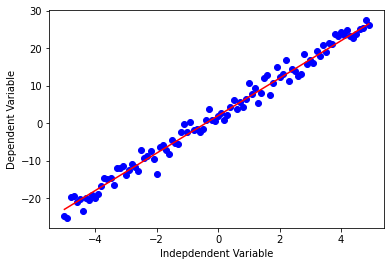

In [80]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = 5*(x) + 2
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

### **Quadratic**

$$ Y = X^2 $$

x: [-5.  -4.9 -4.8 -4.7 -4.6]
y: [25.   24.01 23.04 22.09 21.16]
ydata: [25.   24.01 23.04 22.09 21.16]


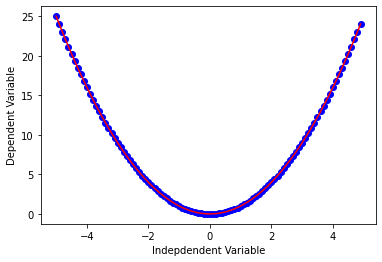

In [81]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
ydata = y 
print('x:', x[0:5])
print('y:', y[0:5])
print('ydata:', ydata[0:5])
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

x: [-5.  -4.9 -4.8 -4.7 -4.6]
y: [25.   24.01 23.04 22.09 21.16]
y_noise: [ 0.23  0.22 -0.72 -0.78 -0.97]
ydata: [25.23 24.23 22.32 21.31 20.19]


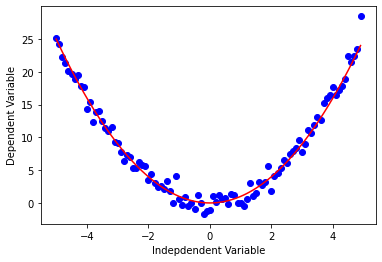

In [82]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
y_noise = np.random.normal(size=x.size)
ydata = y + y_noise
print('x:', x[0:5])
print('y:', y[0:5])
print('y_noise:', y_noise[0:5].round(2))
print('ydata:', ydata[0:5].round(2))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

x: [-5.  -4.9 -4.8 -4.7 -4.6]
y: [25.   24.01 23.04 22.09 21.16]
y_noise: [ 4.38  2.68  0.65  0.64 -1.28]
ydata: [29.38 26.69 23.69 22.73 19.88]


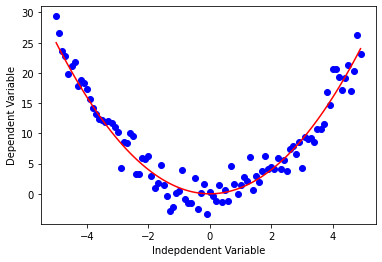

In [83]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
print('x:', x[0:5])
print('y:', y[0:5])
print('y_noise:', y_noise[0:5].round(2))
print('ydata:', ydata[0:5].round(2)) 
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

As can be seen, this function has  x2  as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.

### **Cubic function's graph**

x: [-5.  -4.9 -4.8 -4.7 -4.6]
y: [-102.     -95.539  -89.352  -83.433  -77.776]
y_noise: [-11.48   0.57   3.45 -23.74 -27.74]
ydata: [-113.48  -94.97  -85.9  -107.17 -105.52]


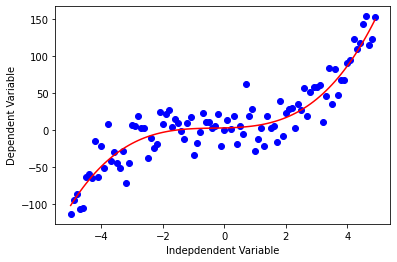

In [84]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
print('x:', x[0:5])
print('y:', y[0:5])
print('y_noise:', y_noise[0:5].round(2))
print('ydata:', ydata[0:5].round(2)) 
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

This function has  x3  and  x2  as independent variables. Also, the graphic of this function is also not a straight line over the 2D plane. So this too is a non-linear function.

Some other types of non-linear functions are:

### **Exponential**

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.

X: [-5.  -4.9 -4.8 -4.7 -4.6]
Y: [0.007 0.007 0.008 0.009 0.01 ]
Y_noise: [  3.98   9.07  10.9    1.32 -16.29]
Ydata: [  3.99   9.07  10.91   1.33 -16.28]


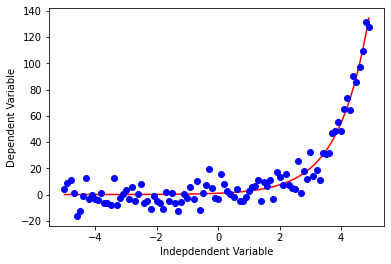

In [85]:
X = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
Y= np.exp(X)
Y_noise = 7 * np.random.normal(size=X.size)
Ydata = Y + Y_noise
print('X:', X[0:5])
print('Y:', Y[0:5].round(3))
print('Y_noise:', Y_noise[0:5].round(2))
print('Ydata:', Ydata[0:5].round(2)) 
plt.plot(X,Y, '-r') 
plt.plot(X, Ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. 
$$ y = \log(x)$$

Please consider that instead of $x$, $X$ can be, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

X: [0.01 0.11 0.21 0.31 0.41]
Y: [-4.61 -2.21 -1.56 -1.17 -0.89]
Y_noise: [ 0.29  0.1   0.31 -0.3  -0.01]
Ydata: [-4.31 -2.1  -1.25 -1.47 -0.9 ]


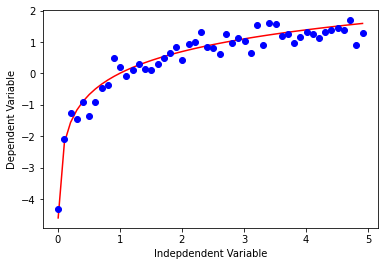

In [86]:
X = np.arange(0.01, 5, 0.1)
Y = np.log(X)
Y_noise = 0.25*np.random.normal(size=X.size)
Ydata = Y + Y_noise
print('X:', X[0:5])
print('Y:', Y[0:5].round(2))
print('Y_noise:', Y_noise[0:5].round(2))
print('Ydata:', Ydata[0:5].round(2)) 
plt.plot(X,Y, '-r') 
plt.plot(X, Ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

X: [0.   0.01 0.04 0.1  0.17]
Y: [-9.21 -4.41 -3.12 -2.34 -1.78]
Y_noise: [ 0.24  0.18 -0.24  0.96 -0.1 ]
Ydata: [-8.97 -4.23 -3.36 -1.38 -1.88]


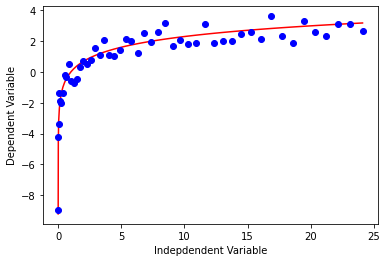

In [87]:
X = np.arange(0.01, 5, 0.1)
X = np.power(X,2)
Y = np.log(X)
Y_noise = 0.5 * np.random.normal(size=X.size)
Ydata = Y + Y_noise
print('X:', X[0:5].round(2))
print('Y:', Y[0:5].round(2))
print('Y_noise:', Y_noise[0:5].round(2))
print('Ydata:', Ydata[0:5].round(2)) 
plt.plot(X,Y, '-r') 
plt.plot(X, Ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### **Sigmoidal/Logistic**
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

X: [-5.  -4.9 -4.8 -4.7 -4.6]
Y: [-3. -3. -3. -3. -3.]
Y_noise: [-0.42 -0.12 -0.15 -0.2  -0.6 ]
Ydata: [-3.42 -3.12 -3.15 -3.19 -3.6 ]


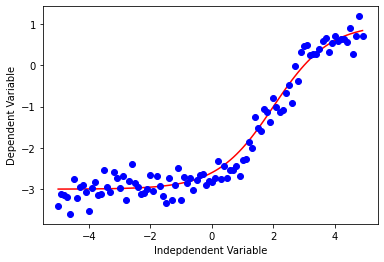

In [88]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
Y_noise = 0.25 * np.random.normal(size=X.size) 
Ydata = Y + Y_noise
print('X:', X[0:5])
print('Y:', Y[0:5].round(2))
print('Y_noise:', Y_noise[0:5].round(2))
print('Ydata:', Ydata[0:5].round(2)) 
plt.plot(X,Y, '-r') 
plt.plot(X, Ydata,  'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

**Non-Linear Regression example**

**Load the Country GDP dataset**

In [89]:
countries = pd.read_csv('/content/Countries GDP 1960-2020.csv')
countries.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11
2,Australia,AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,...,1.400000e+12,1.550000e+12,1.580000e+12,1.470000e+12,1.350000e+12,1.210000e+12,1.330000e+12,1.430000e+12,1.390000e+12,1.330000e+12
3,Austria,AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,...,4.310000e+11,4.090000e+11,4.300000e+11,4.420000e+11,3.820000e+11,3.960000e+11,4.160000e+11,4.550000e+11,4.450000e+11,4.330000e+11
4,Burundi,BDI,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,...,2.235821e+09,2.333308e+09,2.451625e+09,2.705783e+09,3.104395e+09,2.732809e+09,2.748180e+09,2.668496e+09,2.631434e+09,2.841786e+09


In [90]:
china = countries[countries["Country Name"]== 'China']
china = china.drop(['Country Name', 'Country Code'], axis = 1)
china = china.T
china.columns = ['GDP in US$']
df_gdp = china.reset_index()
df_gdp.columns = ['Year', 'GDP in US$']
#df_gdp = pd.read_csv('/content/China GDP.csv')
df_gdp

,Year,GDP in US$
0,1960,5.971647e+10
1,1961,5.005687e+10
2,1962,4.720936e+10
3,1963,5.070680e+10
4,1964,5.970834e+10
...,...,...
56,2016,1.120000e+13
57,2017,1.230000e+13
58,2018,1.390000e+13
59,2019,1.430000e+13


In [91]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        61 non-null     object 
 1   GDP in US$  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [92]:
df_gdp['Year'] = df_gdp['Year'].astype('int32')

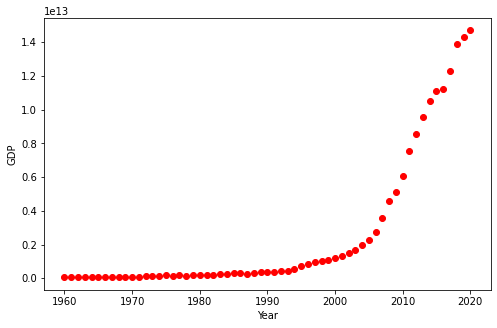

In [93]:
plt.figure(figsize=(8,5))
X = df_gdp['Year']
y = df_gdp["GDP in US$"]
plt.plot(X, y, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## **Method Development : Logistic (Sigmoid) Regression**<a name="Logistic"></a>

From an initial look at the plot, the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model ###

In [94]:
X, y = (df_gdp["Year"].values, df_gdp["GDP in US$"].values)

In [95]:
#Define a function named sigmoid
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

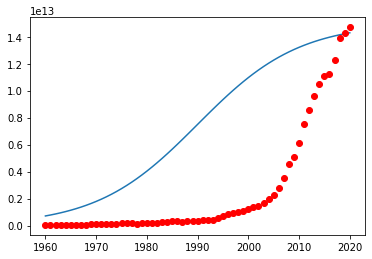

In [96]:
# Develop the sigmoid model with a random beta_1 and beta_2 values
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
y_pred = sigmoid(X, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(X, y_pred*15000000000000.)
plt.plot(X, y, 'ro');

**Find the best parameters for the fit line**

To find the best parameters beta_1 and beta_2 values for the model. For this first normalize X and y:

Then use curve_fit which uses non-linear least squares to fit the sigmoid function, to data to find Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are optimized parameters.

In [97]:
# Normalizing the data
x =X/max(X)
y =y/max(y)

In [98]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x, y)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 565.120192, beta_2 = 0.995458


Plot the resulting regression model with the optimized parameters popt

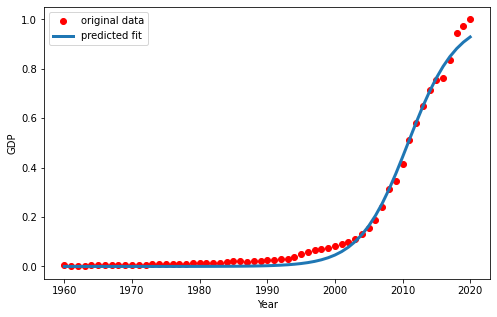

In [99]:
plt.figure(figsize=(8,5))
y_pred = sigmoid(x, *popt)
plt.plot(X, y, 'ro', label='original data')
plt.plot(X,y_pred, linewidth=3.0, label='predicted fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## **Model Evaluation - Logistic (Sigmoid) Regression**<a name="LogisticEvaluation"></a>

In [100]:
# split data into train/test
msk = np.random.rand(len(df_gdp)) < 0.8
x_train = x[msk]
x_test = x[~msk]
y_train = y[msk]
y_test = y[~msk]

# build the model using train set
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# predict using test set
y_hat = sigmoid(x_test, *popt)

# Evaluation metrics
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99


In [101]:
k = df_gdp[['GDP in US$']].shape[1]
n = len(x_test)


from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Logistic (Sigmoid)Regression model is:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error(MSE) of Logistic (Sigmoid)Regression model is:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error (RMSE) of Logistic (Sigmoid)Regression model is:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
# Explained variance score: 1 is perfect prediction
print('Explained Variance Score (EVS) of Logistic (Sigmoid)Regression model is:',explained_variance_score(y_test, y_hat))
#Residual sum of squares (rss)
print("Residual sum of squares of Logistic (Sigmoid)Regression model is: %.2f" % np.mean((y_hat - y_test) ** 2))
print('R2 of Logistic (Sigmoid)Regression model is:',metrics.r2_score(y_test, y_hat))
print('R2 rounded of Logistic (Sigmoid)Regression model is:',(metrics.r2_score(y_test, y_hat)).round(2))
r2 = r2_score(y_test, y_hat)
r2_rounded = r2_score(y_test, y_hat).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Logistic (Sigmoid)Regression model is: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))

Mean Absolute Error(MAE) of Logistic (Sigmoid)Regression model is: 0.024296601759189886
Mean Squared Error(MSE) of Logistic (Sigmoid)Regression model is: 0.0009468941212563902
Root Mean Squared Error (RMSE) of Logistic (Sigmoid)Regression model is: 0.03077164476033724
Explained Variance Score (EVS) of Logistic (Sigmoid)Regression model is: 0.9966364014169049
Residual sum of squares of Logistic (Sigmoid)Regression model is: 0.00
R2 of Logistic (Sigmoid)Regression model is: 0.9910677334131974
R2 rounded of Logistic (Sigmoid)Regression model is: 0.99
Adjusted_r2 of Logistic (Sigmoid)Regression model is:  0.99


### **Plot to display deviations from perfect prediction**

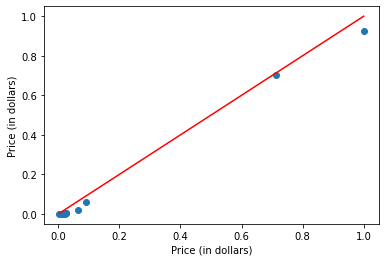

In [102]:
# Final predictions
plt.scatter(y_test, y_hat)

# Perfect predictions
plt.xlabel('Price (in dollars)')
plt.ylabel('Price (in dollars)')
plt.plot(y_test,y_test,'r');
